

**Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import the packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



```
# This is formatted as code
```

**Upload data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TCE_Businessanalyticswpython/Day2_Session3_Dataset1.csv")

**EDA**

In [ ]:
df.head() #shows first 5 rows


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail() #shows last 5 rows

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.describe().T #statistical inferences of each attribute WHERE T is transpose

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df.shape #no.of rows and cols

(200, 5)

In [ ]:
df.nunique() #Count number of distinct elements in each col.


CustomerID            200
Genre                   2
Age                    51
Annual_Income_(k$)     64
Spending_Score         84
dtype: int64

In [ ]:
df.info() #Print a concise summary of a DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Data cleaning**

Check for
1.Null values
2.Feature engineering
3.Data cleaning
4.Preprocessing

In [ ]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

INFERENCE


*   There are no null values in this dataset.


In [ ]:
(df.isnull().sum()/(len(df)))*100

CustomerID            0.0
Genre                 0.0
Age                   0.0
Annual_Income_(k$)    0.0
Spending_Score        0.0
dtype: float64

In [ ]:
df.to_csv("workba.csv")

**We check if there are any unwanted columns**


In [ ]:
df.corr()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


INFERENCE

*   **Customer ID and Spending Score** have a close to zero correlation.This implies that the 2 attributes have a **very weak relationship.This is also applicable for Customer Id and Age.**

*   **Customer ID and Annual income** have a **high positive correlation** which could be interpreted as higher the spending score ; higher the customer id but **correlation is not causation**.Therefore with sufficient domain knowledge we can conclude that this is merely a coincidence.


*   Due to the inferences from above ,**we can conclude that customer id is insignificant to the analysis and hence can be dropped.**








In [ ]:
wb=pd.read_csv("/content/workba.csv")

In [ ]:
wb=wb.drop(['CustomerID'],axis=1)


In [ ]:
wb.head()

,Unnamed: 0,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,Male,19,15,39
1,1,Male,21,15,81
2,2,Female,20,16,6
3,3,Female,23,16,77
4,4,Female,31,17,40


In [ ]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
wb=wb.drop(['Unnamed: 0'],axis=1)

In [ ]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
wb.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


We take Annual income as decision value

In [ ]:
wb = wb.rename(columns={'Annual_Income_(k$)': 'Annual_income'})


In [ ]:
wb.head()

,Genre,Age,Annual_income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
wb.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


**INFERENCES**

*   The **average age** of the surveyed audience is approximately **39**.
*   The **Annual income** of an average candidate in the surveyed group is **around 60k in USD**.
*   The **lowest salary** a person has earned in this survey is **15K usd** and the **maximum salary** is **137k usd**
*   It is unclear how the **spending score** is calculated but based on the context we can infer that it is quantifying the spending habits of the audience **between 0 to 100.**
*   We can infer that **across all 3 attributes** there is **low standard deviation** meaning the average data record will likely be nearer to the mean.
*   The midpoint of a frequency distribution/median can be calculated from 50% column i.e **the median of age , annual income, spending score are 36 , 61.5 and 50 respectively.**
*   **Mean is slightly higher than the median in Age and Spending score meaning it might be right skewed.**











In [ ]:
wb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_income,200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending_Score,200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


**INFERENCE**

*   It is understood that Genre is a categorical data



In [ ]:
#finding categorical and numerical data can also be done by :
cat_cols=wb.select_dtypes(include=['object']).columns
num_cols = wb.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Genre'], dtype='object')
Numerical Variables:
['Age', 'Annual_income', 'Spending_Score']


**UNIVARIATE** **ANALYSIS**

Age
Skew : 0.49


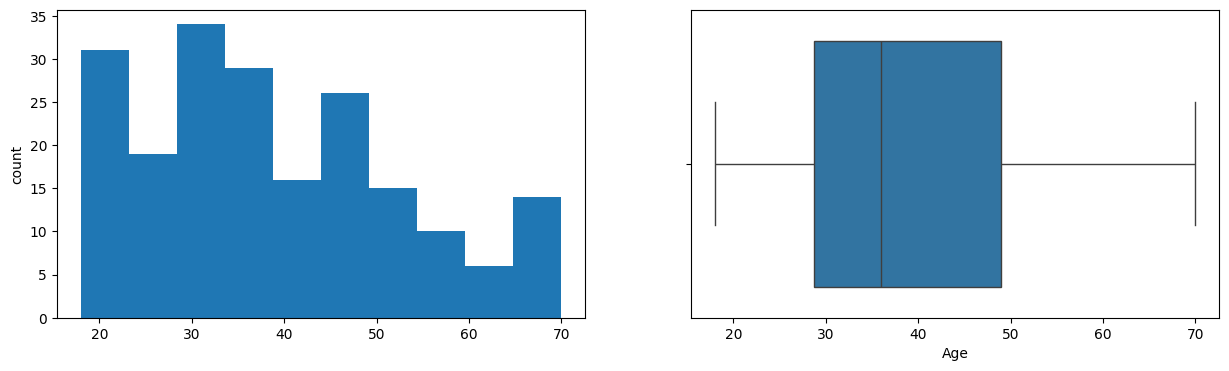

Annual_income
Skew : 0.32


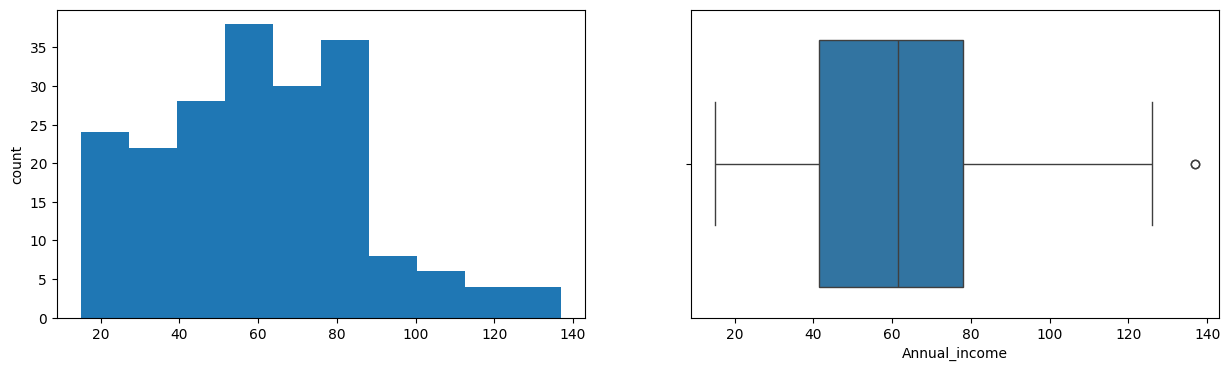

Spending_Score
Skew : -0.05


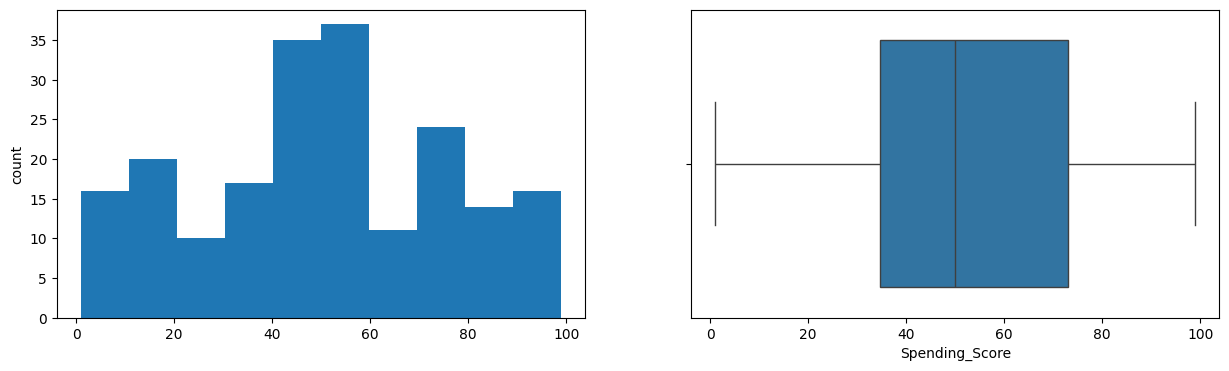

In [ ]:
for col in num_cols:
  print(col)
  print('Skew :', round(wb[col].skew(), 2))
  plt.figure(figsize = (15, 4))
  plt.subplot(1, 2, 1)
  wb[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=wb[col])
  plt.show()

**INFERENCE**

*   The **positive skew of Annual_income and age** refers to the **Region of interest of the data being more in the left half of values** i.e more amount of data is from the 20 to 50 age bracket

*   The **slightly negative skew of the Spending_Score** insists that the the **Region of interest of the data being more in the right half of values** i.e 50 to 100.

*   This also determines the box plot's position.If it has 0 skew , it will be in the centre




In [ ]:
wb.rename(columns = {'Genre':'Gender'}, inplace = True)
#Genre column can be renamed as gender since male and female are the unique values in it.

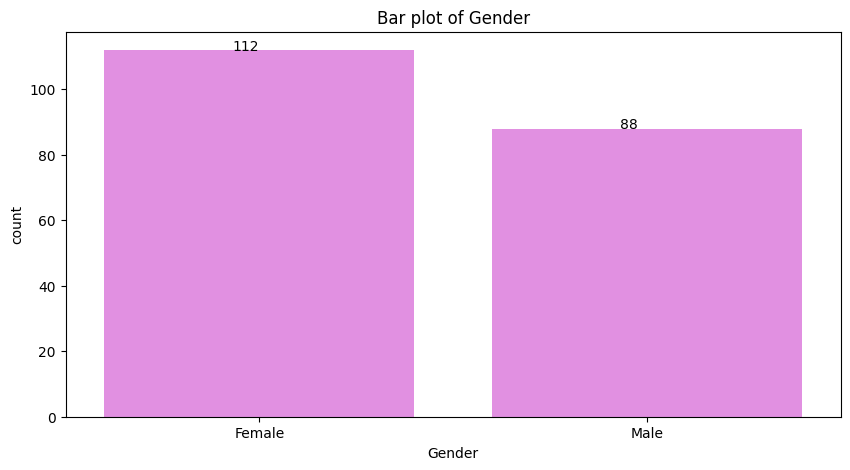

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Gender',data=wb,color='violet',order=wb['Gender'].value_counts().index)
plt.title("Bar plot of Gender")
for p in ax.patches:
   ax.annotate(format(p.get_height(), '.0f'), (p.get_x()+0.33, p.get_height()+0.01))
plt.show()

Notes :

**format(p.get_height()):**This part formats the height of the current bar represented by p as a floating-point number.

**'.0f' :** This part makes it a floating pt number with no digits after decimal point.

**p.get_x():** This method retrieves the x-coordinate of the left edge of the bar.

**p.get_height():** This method retrieves the height of the bar.


**(p.get_x() + 0.25, p.get_height() + 0.01)** : Specifies the position where you want to annotate the bar.



<Axes: ylabel='Gender'>

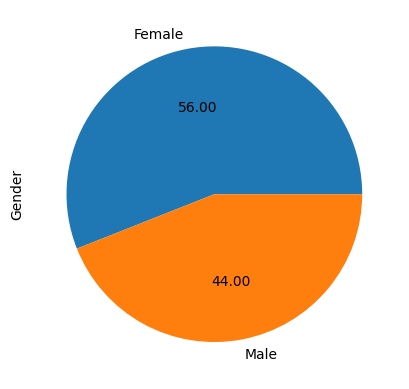

In [ ]:
wb['Gender'].value_counts().plot(kind='pie',autopct='%.2f')


INFERENCE



*  It can be inferred that there are **112 females** and ***88 males*** in this dataset.


*   In percentage , they represent 56 % and 44 % respectively





<Axes: xlabel='Annual_income', ylabel='Density'>

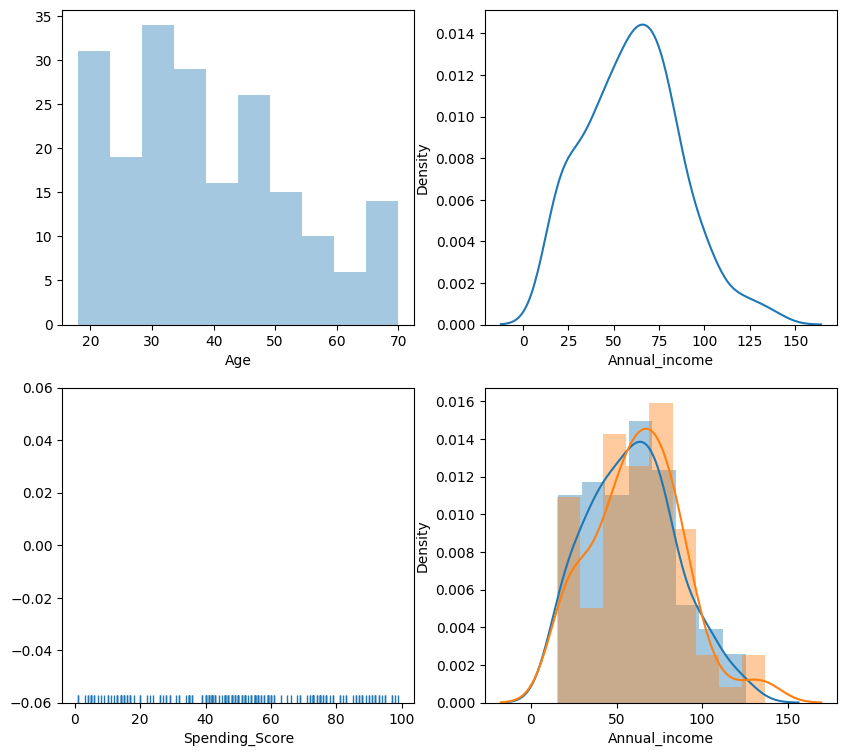

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10,9))
sns.distplot(wb["Age"],bins=10,kde=False,ax=axes[0, 0]);
#hisogram visualises data by counting the no.of observation in each bins
#bin = 10 ==> max-min / 10 ( for each bin )
sns.distplot(wb["Annual_income"],hist=False,ax=axes[0, 1])
#KDE represents the probability density function of a given observation
sns.distplot(wb["Spending_Score"],hist=False,kde=False,rug=True,ax=axes[1,0])
#Rug plot plots a small vertical line for every observation.
#Higher density means there is a continuity.(Thicker line)
#Histogram Vs Rug plot : In a bin the density cant be specified but in rug plot we know where the observation is tilted towards.
sns.distplot(wb[wb["Gender"]=='Female']['Annual_income'],ax=axes[1,1])
sns.distplot(wb[wb["Gender"]=='Male']['Annual_income'],ax=axes[1,1])


INFERENCE


Histogram :
*   It can be inferred that this dataset contains** the most no.of people** in the (approximately) **29 - 35 age bracket**.

*   Also that **59 - 64** is the **least represented age bracket**.

KDE :
*  It is inferred that the **probability of finding someone in the annual income range of 50 to 100K is higher.**
*   We can also infer that the **probability of finding someone in the annual income range of 150 K and above is the lowest.**

Rug Plot :

*   We can infer that **majority of the individuals** in this dataset have a **spending score** in the range of **40 to 60**.

Distplot :

In the distplot blue line = Female and orange line = Male
Through this distplot , it can be inferred that :


*   If the annual income is **0 to 60 K** the probability of it being a **Female's salary** is higher.
*   On contrary , if the annual income is between **60K to 100 K** the probability of it being a **Male's salary** is higher.
*   If the annual income is **100 to 125 K** the probability of it being a **Female's salary** is higher.
*   And again if the annual income is **above 125 K** the probability of it being a **Male's salary** is higher.


*   This might indicate a **gender related pay disparity**.Upon further analysis this hypothesis can be delved into by adding the age variable and finding whether for similar experience level , females tend to get paid lesser or not.











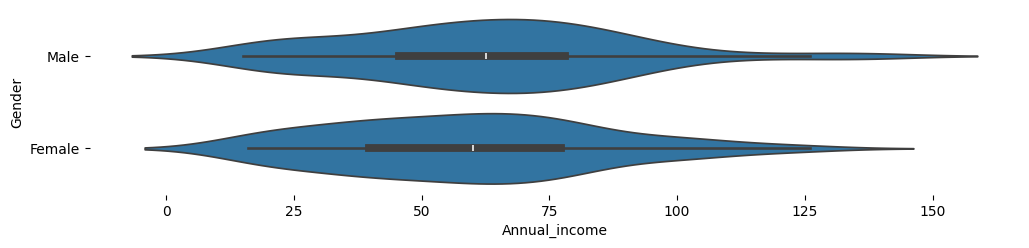

In [ ]:
# Violin plot is kde + box plot and is used to compare distribution of a var across some categories.
#white is iqr and black is box plot
# IQR is to assess the variability where most of your values lie.
figsize = (12, 1.2 * len(wb['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(wb, x='Annual_income', y='Gender')
sns.despine(top=True, right=True, bottom=True, left=True)

INFERENCE


*   Here ,it can be inferred that **most females get Annual income lesser than most males.**



In [ ]:
#sns.catplot(x='Gender',y='Annual_income',kind='violin',data=wb)

<Figure size 1300x1700 with 0 Axes>

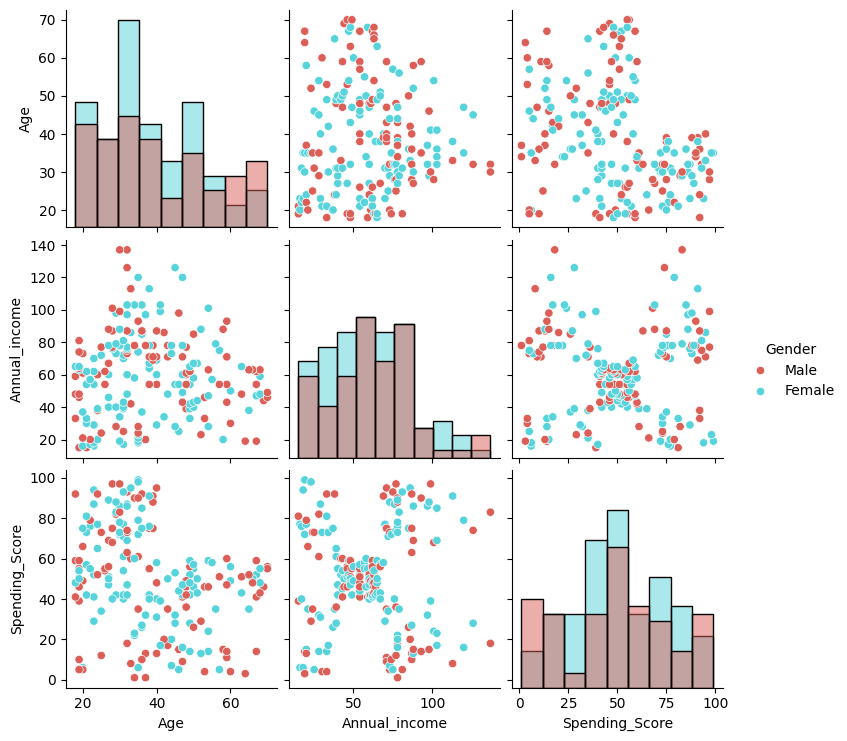

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(wb,hue='Gender',palette='hls',diag_kind='hist')
#pair plots are used to plot multiple pairwise bivariate distribution in a dataset.I.e shows relationships for each pair of cols
#It also shows univariate distribution of each col in the diagonal axis
plt.show()

INFERENCE


*   Through the pair plot , we can confirm that there might be a **gender pay disparity since for similar ages (experience level) the income seems to be higher in the case of men.**
*   The **highly dense scatter plot area** represents the fact that men and women with moderate ( 40 to 80 k ) Annual income have a spending score of approx 45 to 65 meaning they might be **living paycheck to paycheck with little to no savings.**

*   The observation plotted on its **left** are individuals who are **financially responsible** with decent amount of their income saved whereas the opposite is true for observations on its right.
*   For the **ages** between **20 to 40** , the **spending score is higher**.This might be due to family needs.





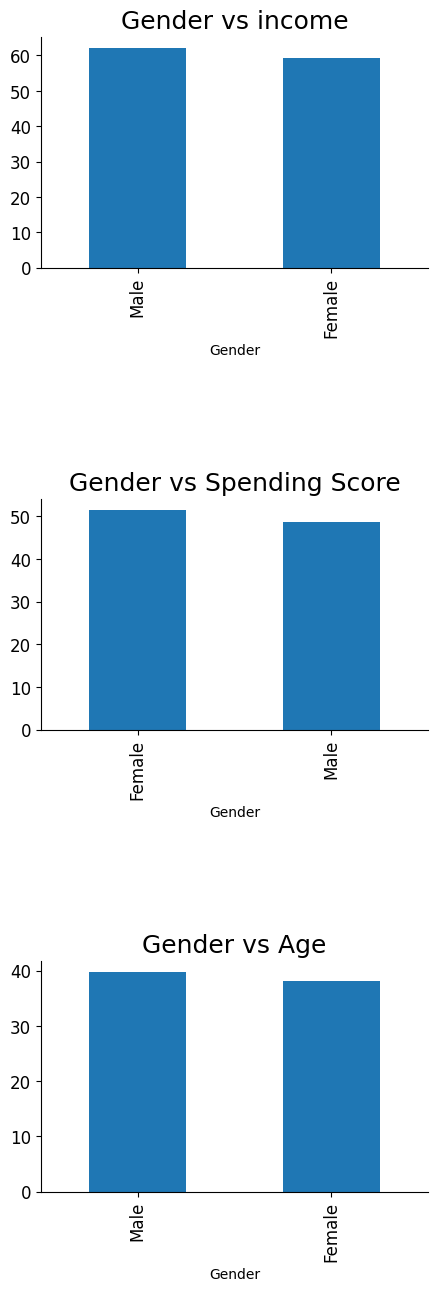

In [ ]:
fig, axarr = plt.subplots(3, figsize=(5,15))
wb.groupby('Gender')['Annual_income'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12)
axarr[0].set_title("Gender vs income", fontsize=18)
wb.groupby('Gender')['Spending_Score'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12)
axarr[1].set_title("Gender vs Spending Score", fontsize=18)
wb.groupby('Gender')['Age'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2], fontsize=12)
axarr[2].set_title("Gender vs Age", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

INFERENCE

*   Our previous hypothesis is confirmed that the annual income is higher in male as compared to female.
*   We can also infer that the spending score is higher among females.


*   This dataset has included slightly older population range for males.





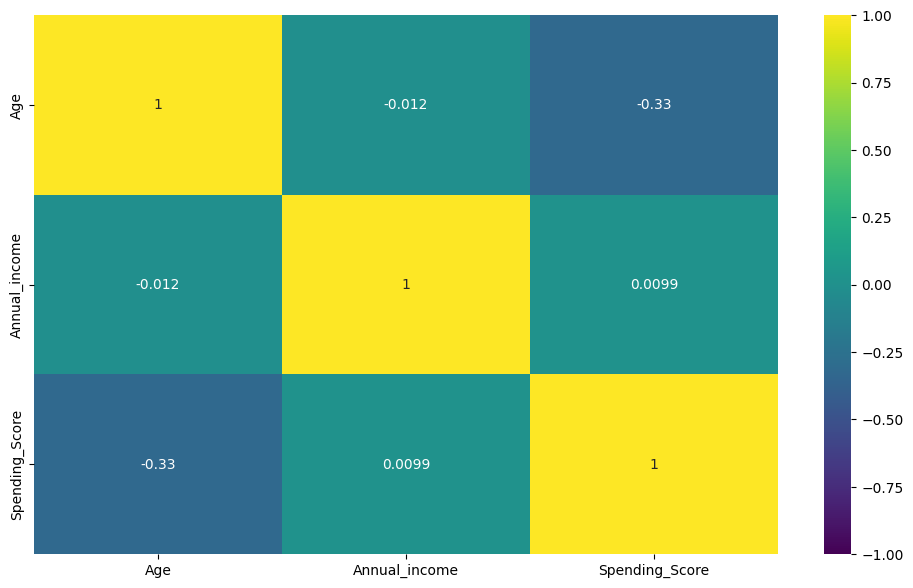

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(wb.corr(), annot =True, vmin = -1, vmax = 1,cmap='viridis')
plt.show()

INFERENCES

*   **Age and Spending score** have a **moderate negative correlation**.We can infer that **older customers tend to spend lesser**.

*    Typically one would expect there to be some level of relationship between **income and spending score**.Such a low correlation coefficient suggests that, in this particular dataset, **there isn't a strong linear relationship** between annual income and spending score. This means that while there might be some relationship between income and spending,**it's not well captured by a linear correlation.**


*   Gender attribute isn't included here because it is a categorical column.